<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/wbqvbi6o6ip0vz55ua5gp17g4f1k7ve9.png" width = 300, align = "center"></a>

<h1 align=center><font size = 5> GRAPHES BASIQUES</font></h1>

<hr>

## Table des matières

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#Introduction">Introduction</a></li>
        <li><a href="#Nuage de points">Nuage de points</a></li>
        <li><a href="#Tracés linéaires">Tracés linéaires</a></li>
        <li><a href="#Tracés linéaires simples">Tracés linéaires simples</a></li>
        <li><a href="#Regression">Regression</a></li>
    </ol>
</div>
<br>
<hr>

<a id="ref0"></a>
<h2 align=center>Introduction</h2>

La visualisation de données est la présentation de données avec des graphiques. C'est un moyen de résumer vos conclusions et de les afficher sous une forme qui facilite l'interprétation et peut aider à identifier des modèles ou des tendances.
Avoir de superbes visualisations de données rendra votre travail plus intéressant et plus clair.
Dans ce cahier, vous apprendrez à créer des nuages ​​de points et des graphiques linéaires.

<hr>

<a id="ref1"></a>
<h2 align=center>Nuage de points</h2>

Un nuage de points utilise des points et des coordonnées cartésiennes pour afficher la position des valeurs de deux ou plusieurs variables. Il est possible de tracer des nuages de points en 2D et 3D.

Commençons par importer la bibliothèque `ggplot2`.

In [3]:
if("ggplot2" %in% rownames(installed.packages()) == FALSE) {install.packages("ggplot2")}
library(ggplot2)

Nous pouvons créer un nuage de points 2D très simple en utilisant simplement qplot. L'utilisation de deux variables comme paramètres crée un nuage de points par défaut. Ici, nous utilisons le jeu de données mtcars.

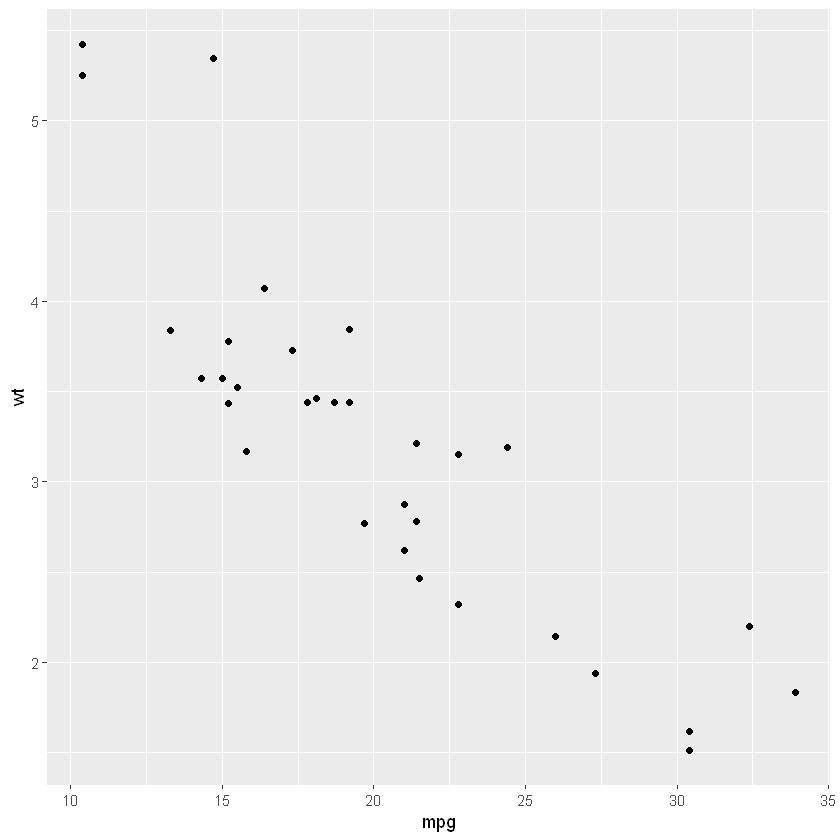

In [4]:
qplot(mpg, wt, data=mtcars)

Nous pouvons créer un graphique similaire en utilisant ggplot.

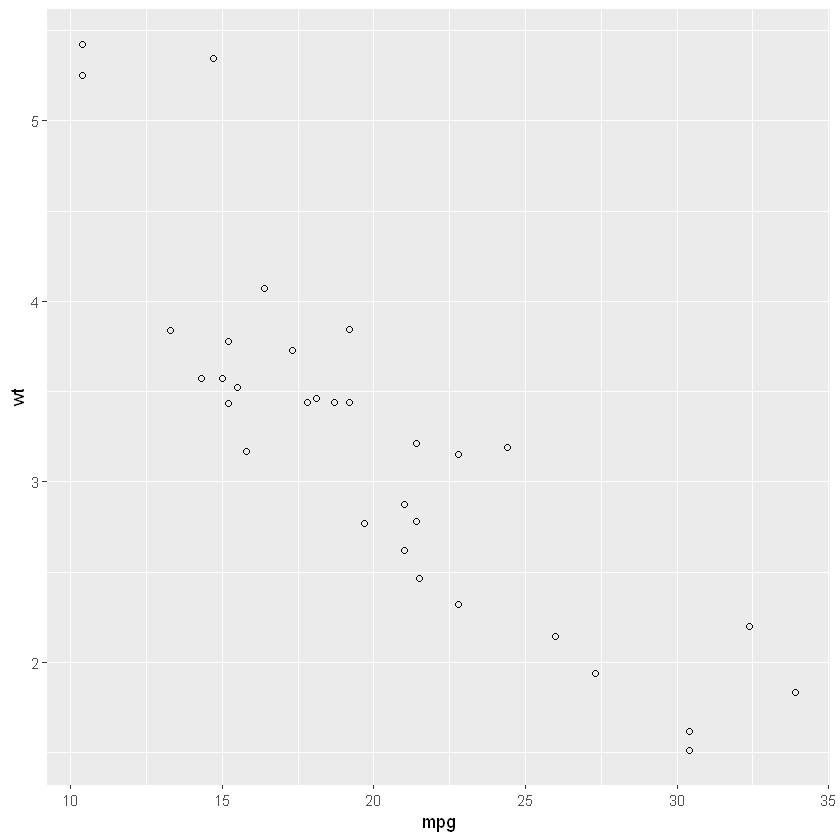

In [6]:
ggplot(mtcars, aes(x = mpg, y = wt)) + geom_point(shape=1)

Vous avez dû remarquer que la forme des cercles a changé. On peut avoir des cercles pleins modifiant le paramètre `geom_point`.

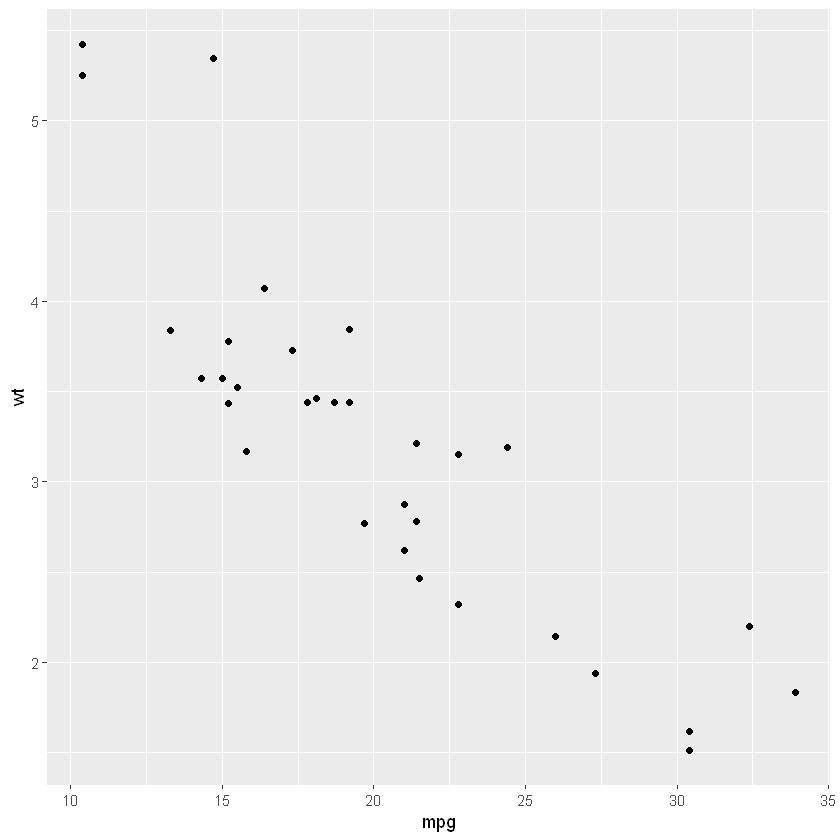

In [7]:
ggplot(mtcars,aes(x=mpg,y=wt)) + geom_point(shape=19)

Comme nous pouvons contrôler les formes, nous pouvons en tirer parti et tracer trois variables dans un nuage de points bidimensionnel. Il vous suffit de passer le paramètre 'shape' en tant que colonne présente dans votre dataset.

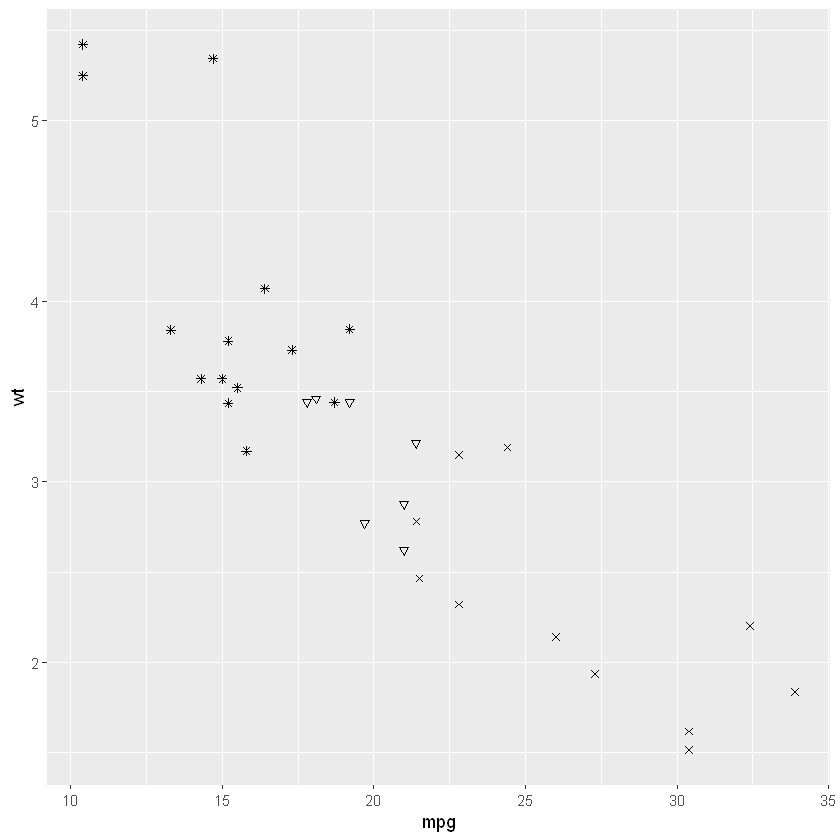

In [8]:
ggplot(mtcars,aes(x=mpg,y=wt,shape = cyl)) + geom_point() + scale_shape_identity()

Cela n'a pas fonctionné. C'est parce que nous avons besoin d'avoir des données catégorielles, au lieu de numériques. Nous pouvons corriger ce facteur de création pour les cylindres.

In [9]:
mtcars$cylFactor<- factor(mtcars$cyl)

Il ne nous reste plus qu'à tracer à nouveau notre graphique.

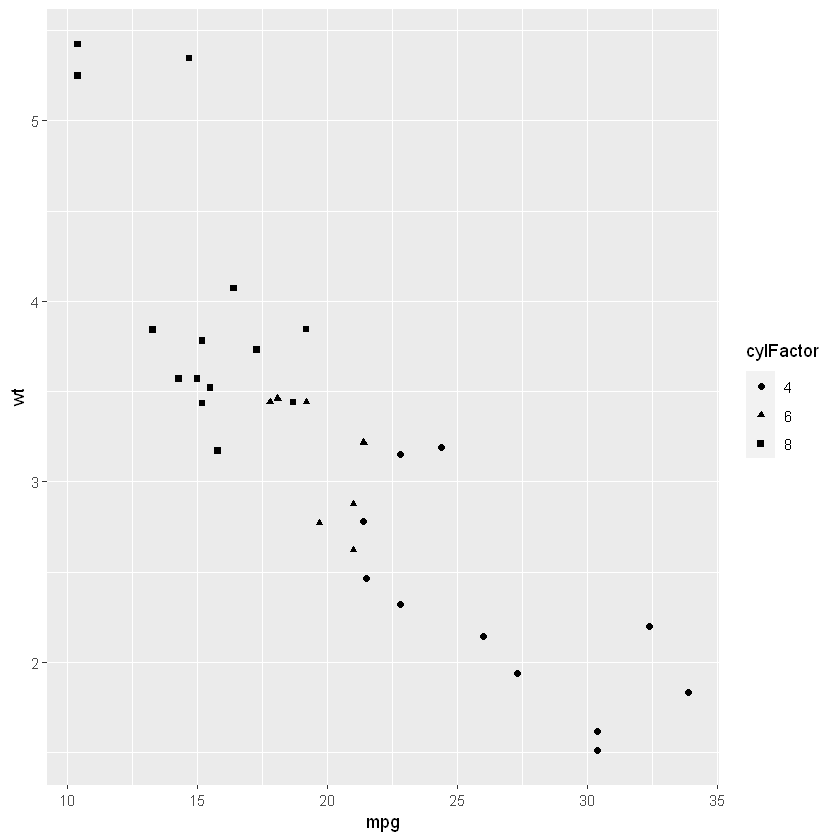

In [10]:
ggplot(mtcars,aes(x=mpg,y=wt,shape = cylFactor)) + geom_point()

Nous pouvons changer les couleurs de nos cercles en utilisant le paramètre 'couleur'

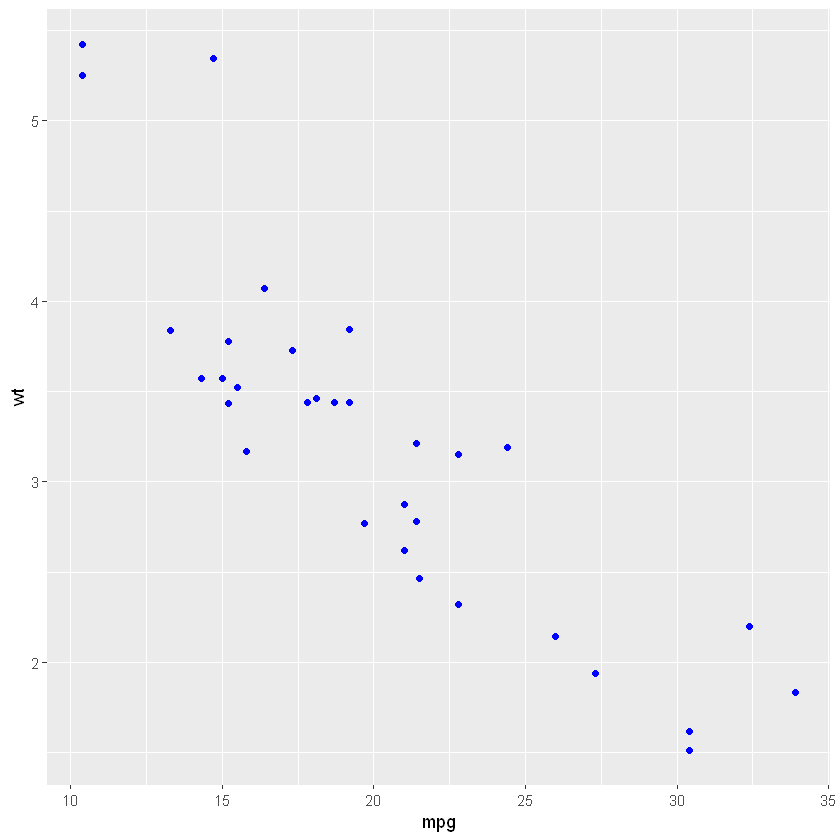

In [11]:
ggplot(mtcars,aes(x=mpg,y=wt)) + geom_point(shape=19, colour="blue")

Comme nous l'avons fait avec les formes, nous pouvons faire la même chose avec les couleurs. Encore une fois, vous passez simplement le paramètre `couleur` en tant que colonne présente dans votre ensemble de données.

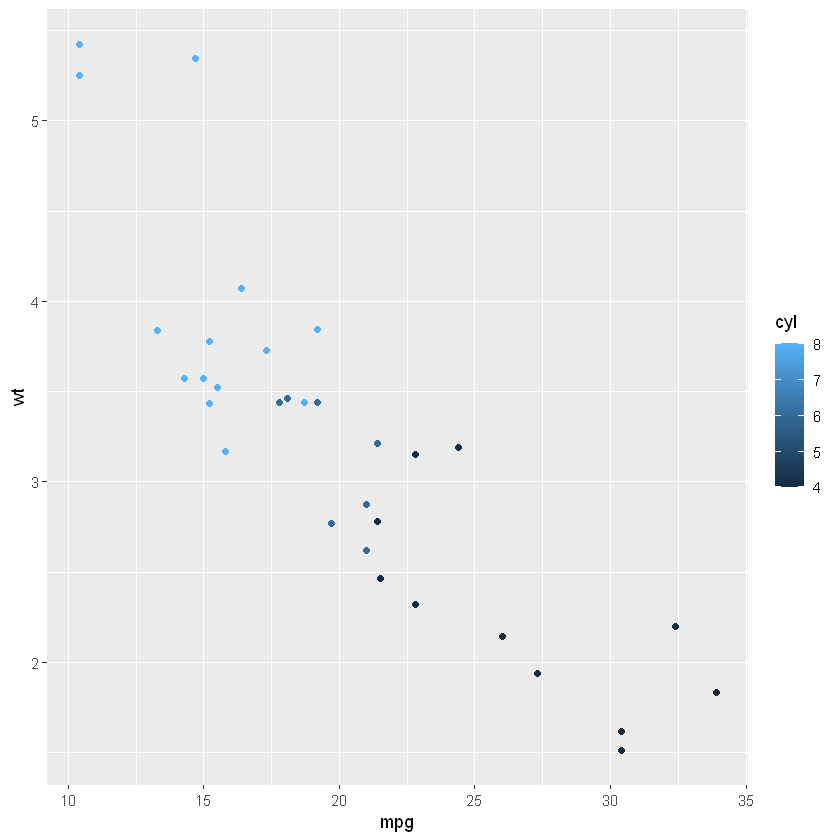

In [12]:
ggplot(mtcars,aes(x=mpg,y=wt,color = cyl))+ geom_point(shape=19)

Comme le graphique précédent utilisait des données numériques, il créait l'étiquette avec un gradient de 4 à 8. Si nous utilisons des données catégorielles, comme les « cylFactors », nous pouvons attribuer une couleur unique à chaque catégorie.

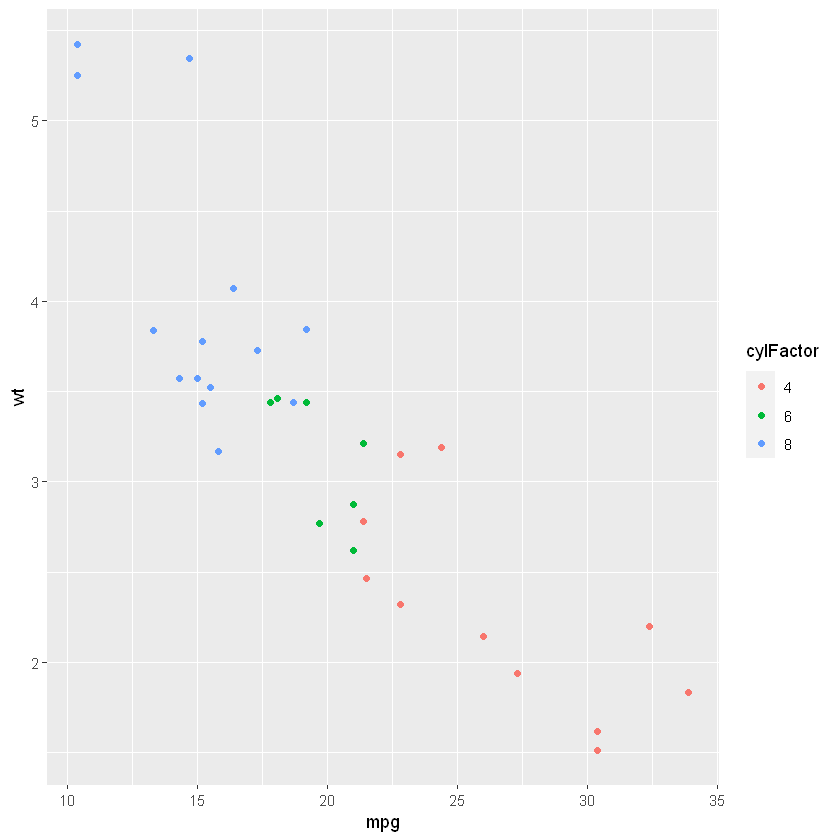

In [13]:
ggplot(mtcars,aes(x=mpg,y=wt,color = cylFactor)) + geom_point(shape=19)

Maintenant, nous devons renommer notre légende. Nos utilisateurs ne comprendraient pas ce qu'est exactement cylFactors.

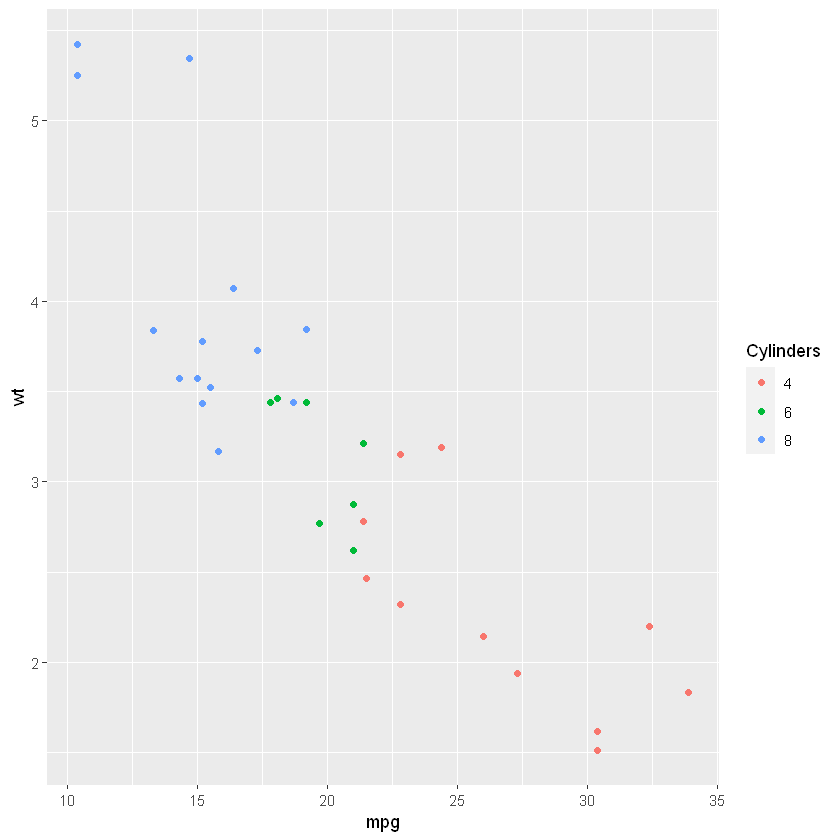

In [14]:
ggplot(mtcars,aes(x=mpg,y=wt,color = cylFactor)) + geom_point(shape=19) + labs(colour = "Cylinders")

Juste pour terminer notre graphique, nous pouvons renommer et créer les étiquettes restantes.

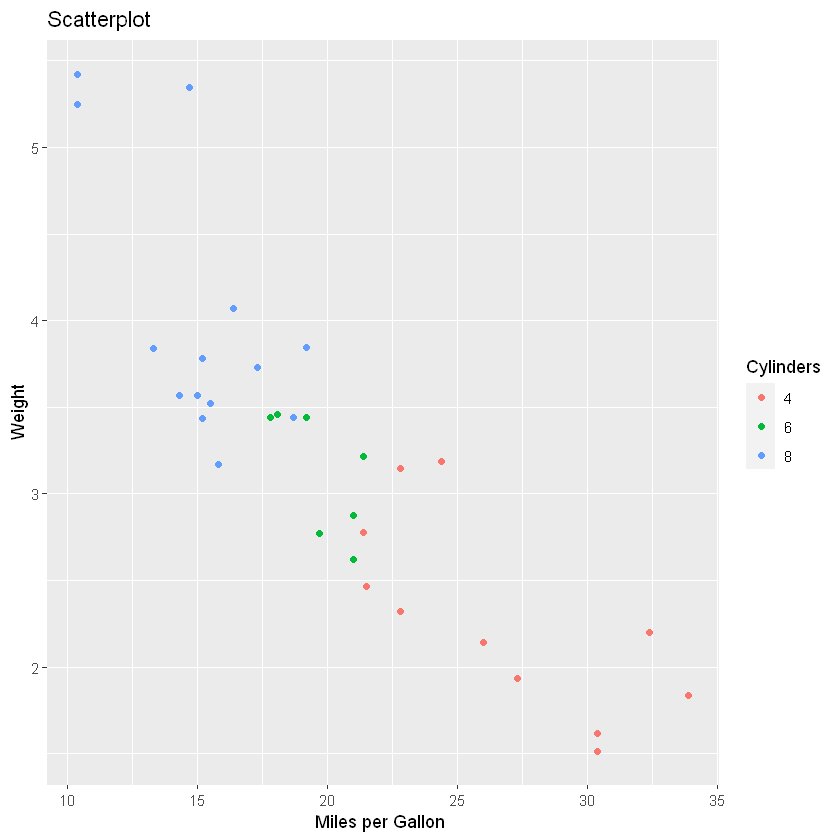

In [15]:
ggplot(mtcars,aes(x=mpg,y=wt,color = cylFactor)) + geom_point(shape=19) + xlab("Miles per Gallon ") + ylab("Weight") +
  labs(colour = "Cylinders") + ggtitle("Scatterplot")

<hr>

<a id="ref2"></a>
<h2 align=center>Tracés linéaires</h2>

Les tracés linéaires sont également des représentations de données dans lesquelles les coordonnées cartésiennes sont utilisées. Tout comme les nuages de points, les données sont transformées en points - cependant, dans les graphiques linéaires, elles sont reliées par des lignes, comme leur nom l'indique.

<a id="ref3"></a>
<h3>Tracés linéaires simple</h3>

Pour les tracés linéaires simples, nous allons utiliser le jeu de données EuStockMarkets. Il s'agit également d'un ensemble de données inclus avec R et qui décrit les données historiques de quatre marchés boursiers européens.

Commençons à regarder leur fichier d'aide

In [17]:
?EuStockMarkets

EuStockMarkets {datasets},R Documentation


Comme nous pouvons le voir, il contient 1860 observations pour chacun, et leur type de fichier est `mts`, qui signifie matrice.
`ggplot2` ne fonctionne pas avec les matrices.

Pour contourner cette limitation, nous devons créer une base de données à partir de cette matrice.
Heureusement, il existe une fonction qui fait exactement ce dont nous avons besoin. C'est le `as.data.frame()`.

In [18]:
EuStockDF <- as.data.frame(EuStockMarkets)

Maintenant, regardons les premières lignes de cette base de données, pour voir comment les données sont structurées.

In [19]:
head(EuStockDF)

DAX,SMI,CAC,FTSE
1628.75,1678.1,1772.8,2443.6
1613.63,1688.5,1750.5,2460.2
1606.51,1678.6,1718.0,2448.2
1621.04,1684.1,1708.1,2470.4
1618.16,1686.6,1723.1,2484.7
1610.61,1671.6,1714.3,2466.8


Maintenant, commençons à tracer !

Créons un graphique linéaire du cours de l'action "DAX":

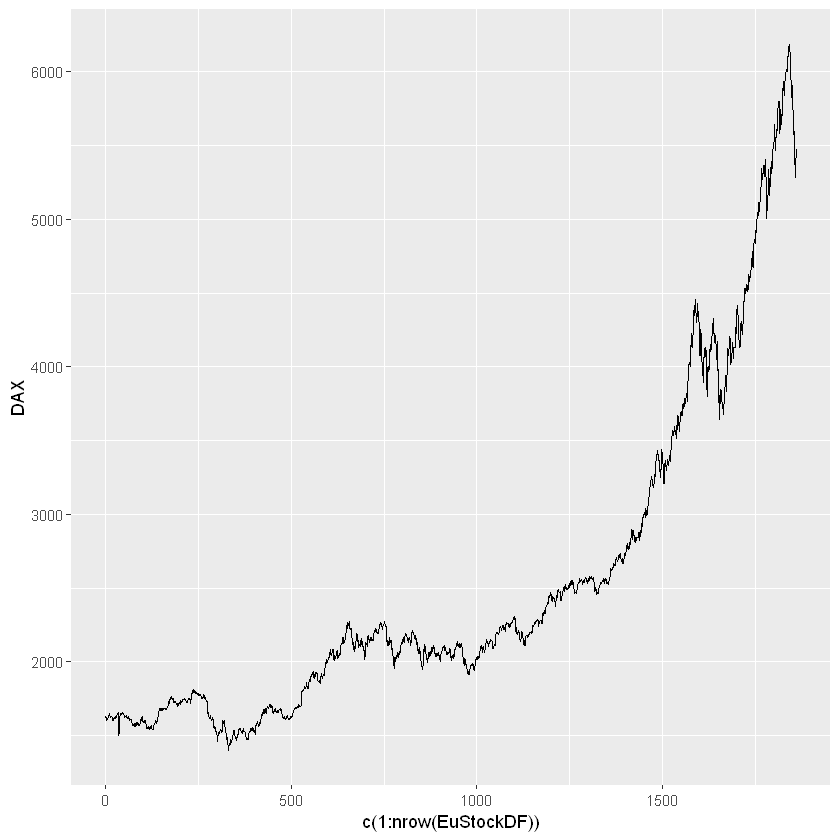

In [20]:
ggplot(EuStockDF,aes(x=c(1:nrow(EuStockDF)), y = DAX)) + geom_line()

Augmentons la largeur de notre ligne :

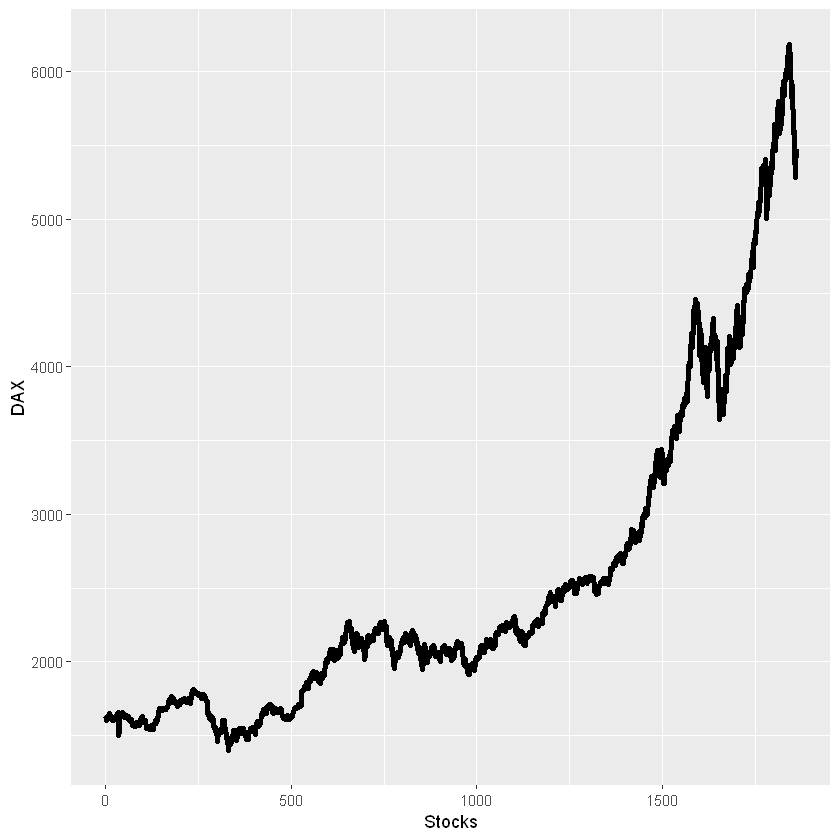

In [21]:
ggplot(EuStockDF,aes(x=c(1:nrow(EuStockDF)), y = DAX)) + geom_line(size=1.5) + labs(x = "Stocks")

Pour changer la couleur, nous pouvons utiliser le paramètre `couleur`.

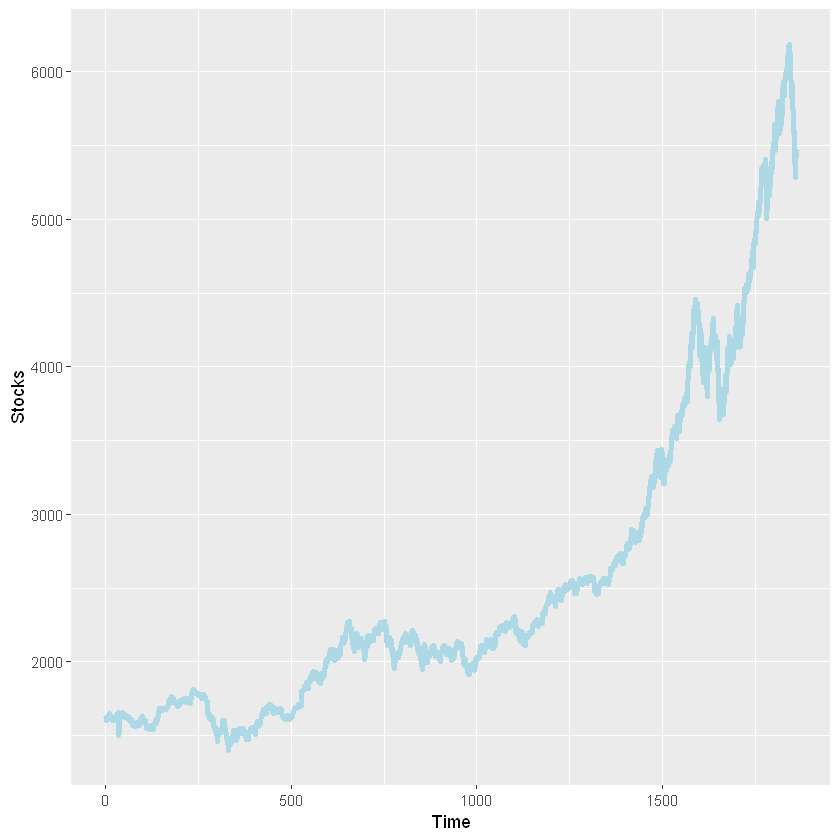

In [22]:
ggplot(EuStockDF,aes(x=c(1:nrow(EuStockDF)), y = DAX)) + geom_line(size=1.5, colour="light blue") + labs(x = "Time", y = "Stocks")

Nous pouvons également tracer plus d'une ligne à la fois dans le même graphique.
Essayons de tracer deux actions dans le même graphique.

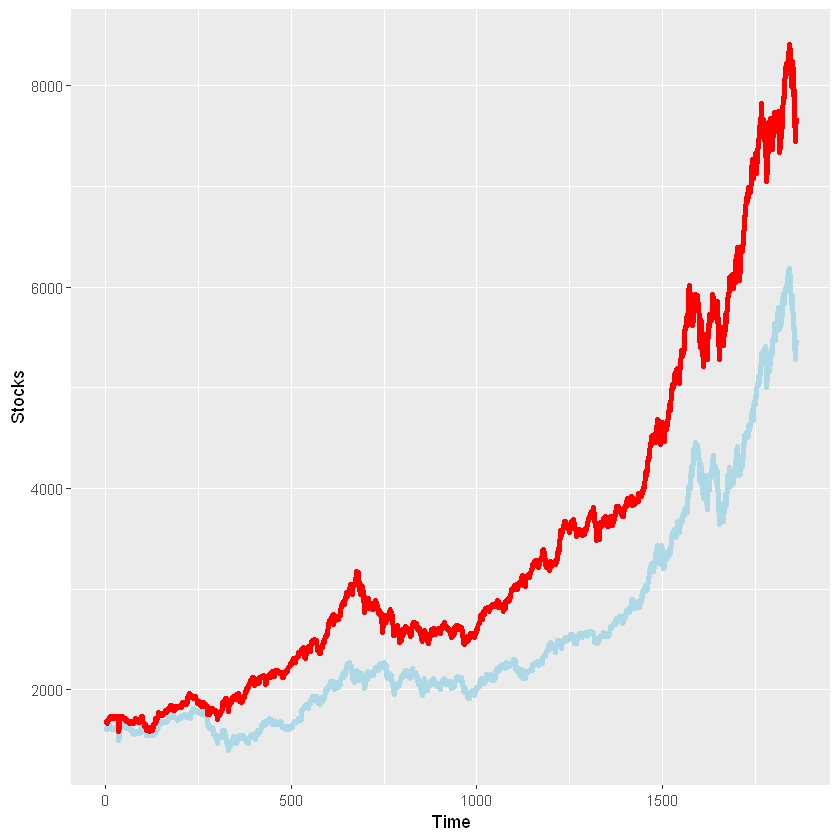

In [23]:
dax_smi_plot <- ggplot() +
  geom_line(data = EuStockDF,aes(x=c(1:nrow(EuStockDF)), y = DAX), size = 1.5, colour="light blue") +
  geom_line(data = EuStockDF,aes(x=c(1:nrow(EuStockDF)), y = SMI), size = 1.5, colour = "red") +
  labs(x = "Time", y = "Stocks")
print(dax_smi_plot)

Maintenant, traçons tous les stocks.

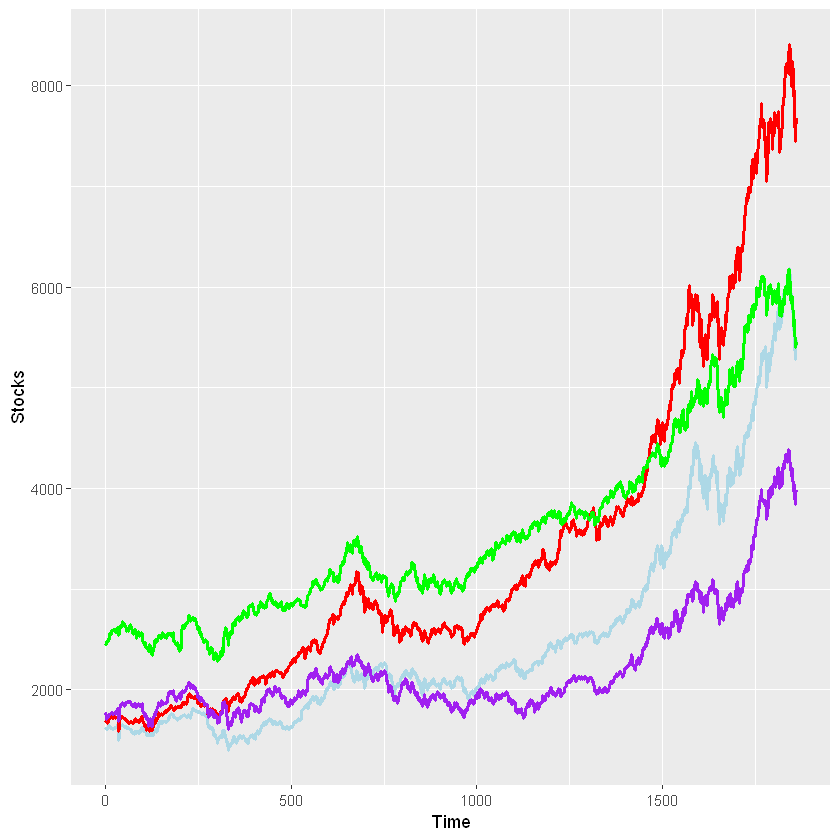

In [25]:
all_stocks <- ggplot() +
  geom_line(data = EuStockDF,aes(x=c(1:nrow(EuStockDF)), y = DAX), size=1, colour="light blue") +
  geom_line(data = EuStockDF,aes(x=c(1:nrow(EuStockDF)), y = SMI), size =1, colour = "red") + 
  geom_line(data = EuStockDF,aes(x=c(1:nrow(EuStockDF)), y = CAC), size =1, colour = "purple") + 
  geom_line(data = EuStockDF,aes(x=c(1:nrow(EuStockDF)), y = FTSE), size =1, colour = "green") +
  labs(x = "Time", y = "Stocks")
print(all_stocks)

Modifions les étiquettes dans notre graphique.

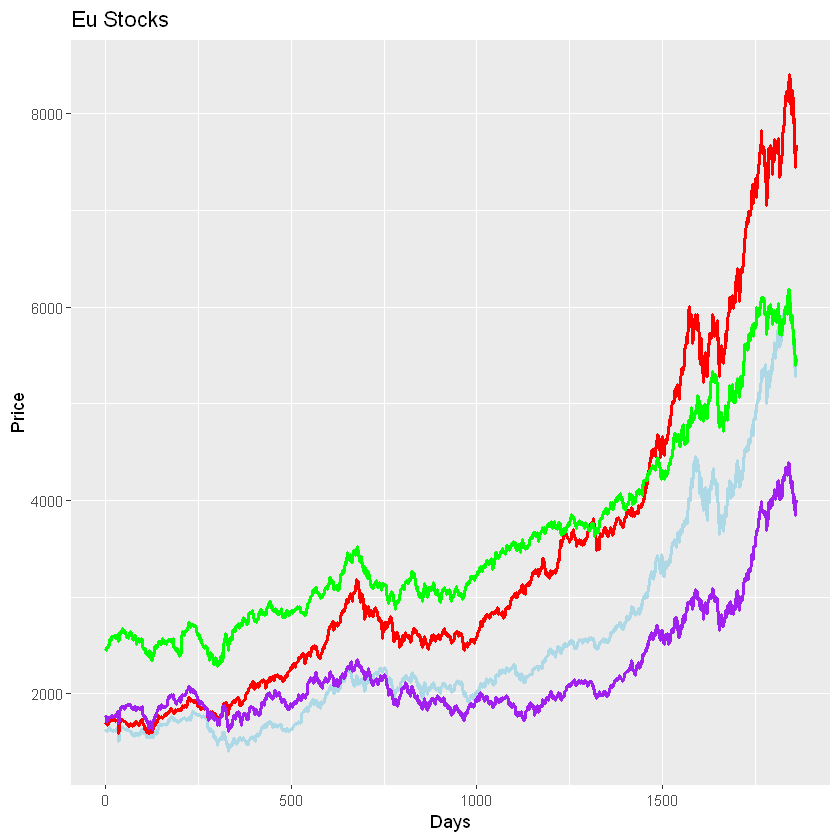

In [26]:
legend_stocks <- all_stocks + xlab("Days") + ylab("Price") + ggtitle("Eu Stocks")
print(legend_stocks)

<a id="ref4"></a>
<h3>Regression</h3>

La régression est un concept de modélisation mathématique dans lequel une formule linéaire est créée pour simuler le comportement perçu des points de données pour lesquels vous créez le modèle. La régression est un excellent moyen de visualiser les tendances et de créer des prédictions de base.

Les prédictions sont faites sur un ensemble de variables, étant donné un autre ensemble de variables. Les tendances sont généralement extraites de la relation entre deux ensembles de variables. Dans cet exemple, nous allons vérifier s'il existe une relation entre le poids et les miles par gallon d'une voiture.

Pour visualiser la régression, nous pouvons tracer notre ligne d'ajustement sur nos graphiques. Utilisons le même exemple de la section précédente et dessinons notre droite de régression par-dessus.

La première méthode que nous utiliserons est la régression linéaire, qui est une régression qui utilise ce que nous appelons un modèle linéaire. Pour ce faire, nous passons le paramètre `lm` à l'attribut `method` de la fonction `geom_smooth`, comme ceci :

`geom_smooth()` using formula 'y ~ x'


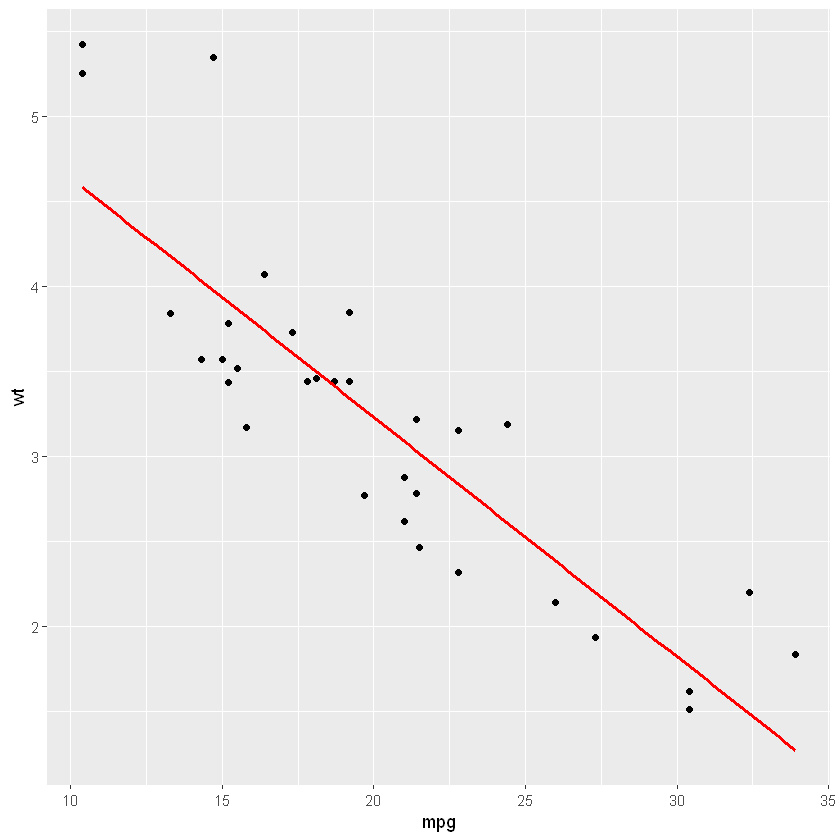

In [27]:
ggplot(mtcars,aes(x=mpg,y=wt))  + geom_point(shape=19) +
  geom_smooth(method="lm", se= FALSE, color = "red")

Vous avez peut-être remarqué que notre code a `se = FALSE` dessus. `se` représente ce que nous appelons "l'intervalle de confiance" de notre modèle. Les intervalles de confiance sont des limites inférieures et supérieures dans lesquelles nous pouvons avoir une certitude à 95 % qu'un point de données se trouvera.

Si vous souhaitez afficher cet intervalle, vous pouvez soit ignorer l'attribut `se`, soit le définir comme `TRUE`.

`geom_smooth()` using formula 'y ~ x'


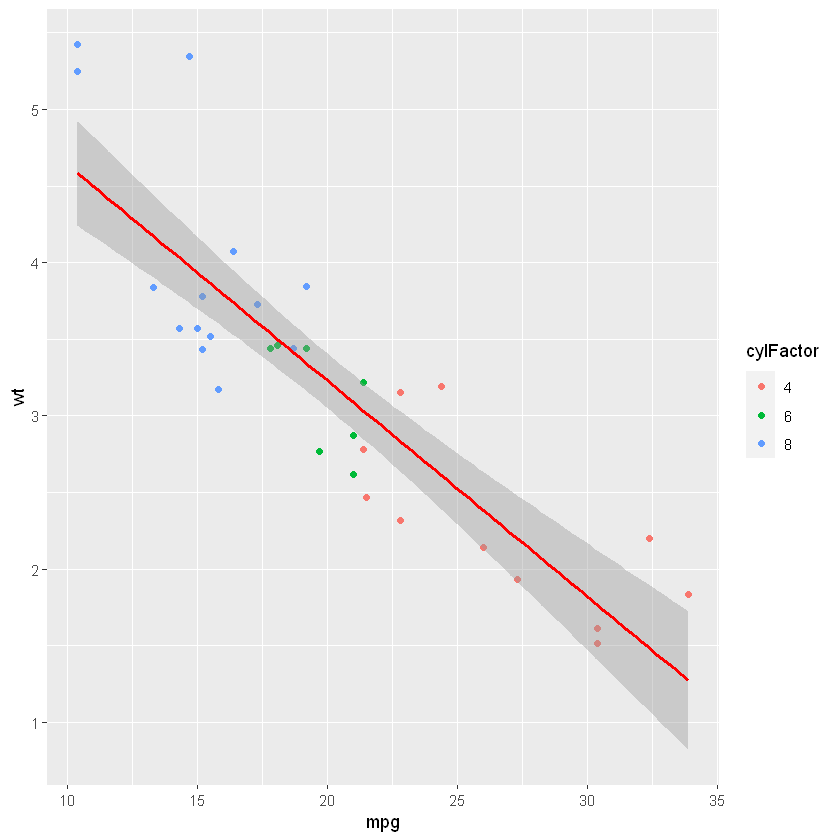

In [28]:
#se = TRUE  -> confidence interval appear (default = true)
ggplot(mtcars,aes(x=mpg,y=wt,color = cylFactor)) + geom_point(shape=19) + geom_smooth(method="lm", se= TRUE, color = "red")

Comme pour les autres graphiques, nous pouvons ajouter des étiquettes de nos graphiques de régression linéaire :

`geom_smooth()` using formula 'y ~ x'


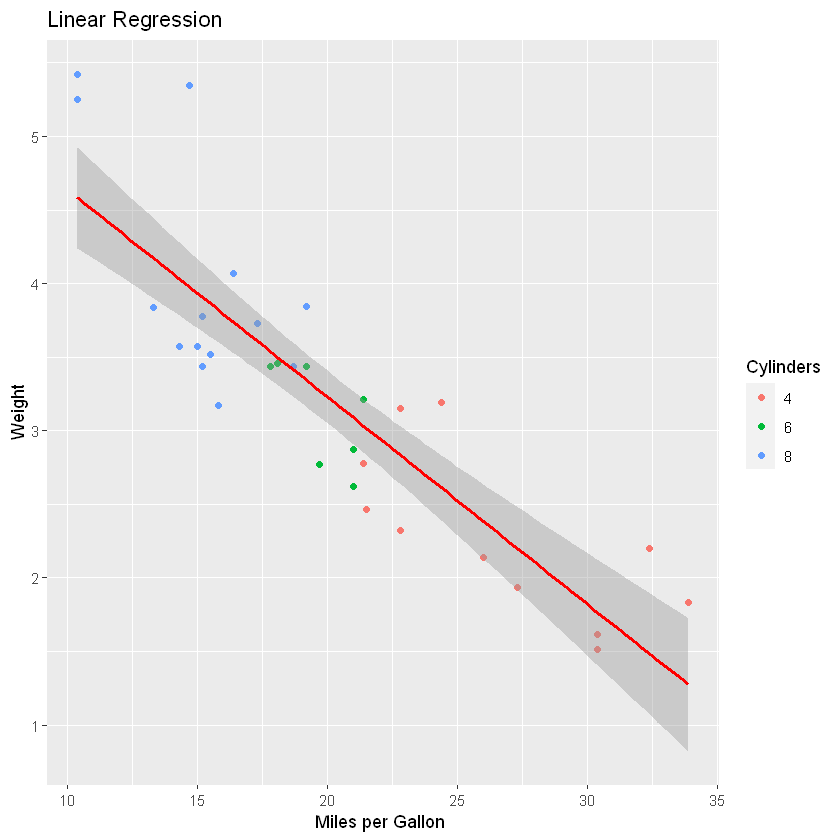

In [29]:
ggplot(mtcars,aes(x=mpg,y=wt,color = cylFactor)) + geom_point(shape=19) + 
  geom_smooth(method="lm", se= TRUE, color = "red") + xlab("Miles per Gallon ") + 
  ylab("Weight") +  labs(colour = "Cylinders") + ggtitle("Linear Regression")

Un autre type de régression utilise le modèle gaussien. Au lieu d'une ligne droite, le modèle gaussien correspond à une courbe (peut-être pas droite). Pour utiliser le modèle gaussien, on passe le paramètre 'auto' à l'attribut 'method'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


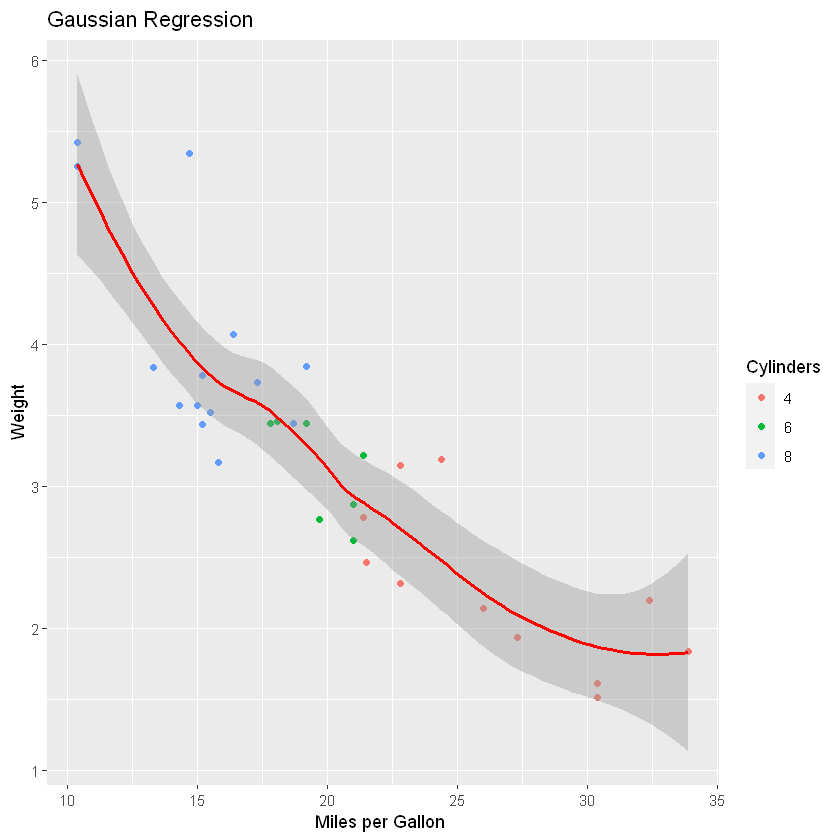

In [30]:
ggplot(mtcars,aes(x=mpg,y=wt,color = cylFactor)) + geom_point(shape=19) + 
  geom_smooth(method="auto", se= TRUE, color = "red") + xlab("Miles per Gallon ") + 
  ylab("Weight") +  labs(colour = "Cylinders") + ggtitle("Gaussian Regression")

<hr>

### A propos de l'auteur:
Salut! Ce sont [Francisco Magioli](https://www.linkedin.com/in/franciscomagioli) et [Erich Natsubori Sato](https://www.linkedin.com/in/erich-natsubori-sato), les auteurs de ce carnet. Nous espérons que vous avez trouvé R facile à apprendre ! Il y a beaucoup plus à apprendre sur R, mais vous êtes sur la bonne voie. N'hésitez pas à nous contacter si vous avez des questions.

<hr>
Copyright &copy; 2016 [Big Data University](https://bigdatauniversity.com/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).